# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:  Aaron Pelton

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question 1 Week 6

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

# 1. URL of the article
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'

# 2. Fetch the webpage
response = requests.get(url)
response.raise_for_status()  # Raise error for bad responses

# 3. Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

# 4. Try to extract the article tag (common structure)
article = soup.find('article')

# Fallback: If no <article> tag, fall back to main content heuristics
if not article:
    article = soup.find('div', {'id': 'main'}) or soup.find('div', class_='content')

# 5. Store the HTML string
html_content = str(article) if article else ''

# 6. Dump to a Pickle file
with open('article.pkl', 'wb') as f:
    pickle.dump(html_content, f)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

## Question 2 Week 6

In [2]:
# 1. Load the HTML from the .pkl file
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# 2. Parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

# 3. Extract and print the text
text = soup.get_text(separator='\n', strip=True)
print(text)

How Laser Headlights Work
130 Comments
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance aw

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 3 Week 6

In [8]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# 1. Load HTML content from the pickle file
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# 2. Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# 3. Load a spaCy language model
nlp = spacy.load('en_core_web_sm')  # Make sure this model is installed

# 4. Process the text
doc = nlp(text)

# 5. Filter tokens: remove stopwords, punctuation, and whitespace
filtered_tokens = [
    token.text.lower() for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]

# 6. Count token frequencies
token_freq = Counter(filtered_tokens)

# 7. Get the 5 most common tokens
most_common = token_freq.most_common(5)

# 8. Print results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_common:
    print(f"  Token: '{token}'  —  Frequency: {freq}")

Top 5 Most Frequent Tokens:
  Token: 'laser'  —  Frequency: 35
  Token: 'headlights'  —  Frequency: 19
  Token: 'headlight'  —  Frequency: 11
  Token: 'technology'  —  Frequency: 10
  Token: 'led'  —  Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 4 Week 6

In [10]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# 1. Load HTML content from the pickle file
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# 2. Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# 3. Load a spaCy language model
nlp = spacy.load('en_core_web_sm')  # Make sure this model is installed

# 4. Process the text
doc = nlp(text)

# 5. Filter tokens and get lowercase lemmas
filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]

# 6. Count lemma frequencies
lemma_freq = Counter(filtered_lemmas)

# 7. Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# 8. Print results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"  Lemma: '{lemma}'  —  Frequency: {freq}")

Top 5 Most Frequent Lemmas:
  Lemma: 'laser'  —  Frequency: 40
  Lemma: 'headlight'  —  Frequency: 28
  Lemma: 'beam'  —  Frequency: 12
  Lemma: 'technology'  —  Frequency: 10
  Lemma: 'led'  —  Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

## Question 5 Week 6

In [15]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_token):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Tokenize and clean: remove punctuation and spaces
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

    if not words:
        return 0.0  # Avoid division by zero

    # Count how many words are in the interesting_token list
    interesting_count = sum(1 for word in words if word in interesting_token)

    # Compute the token score
    token_score = interesting_count / len(words)
    return token_score


def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Score = (# of matching interesting lemmas in sentence) / (# of words in sentence)
    """

    # Process the sentence
    doc = nlp(sentence)

    # Extract meaningful lemmas: ignore punctuation, whitespace
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]

    if not lemmas:
        return 0.0  # Avoid division by zero

    # Count how many lemmas are in the interesting_lemmas list
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)

    # Compute and return the lemma score
    lemma_score = interesting_count / len(lemmas)
    return lemma_score

# 4. Get the first sentence
first_sentence = next(doc.sents).text  # Use next() to get the first sentence

# 5. Use it with your scoring functions
print("First sentence:")
print(first_sentence)

# Step 6: Score using token and lemma functions
token_score = score_sentence_by_token(first_sentence, [t[0] for t in most_common])
lemma_score = score_sentence_by_lemma(first_sentence, [l[0] for l in most_common_lemmas])

# Step 7: Print the results
print(f"\nToken-Based Score: {token_score:.2f}")
print(f"Lemma-Based Score: {lemma_score:.2f}")

First sentence:
How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Token-Based Score: 0.12
Lemma-Based Score: 0.09


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6 Week 6

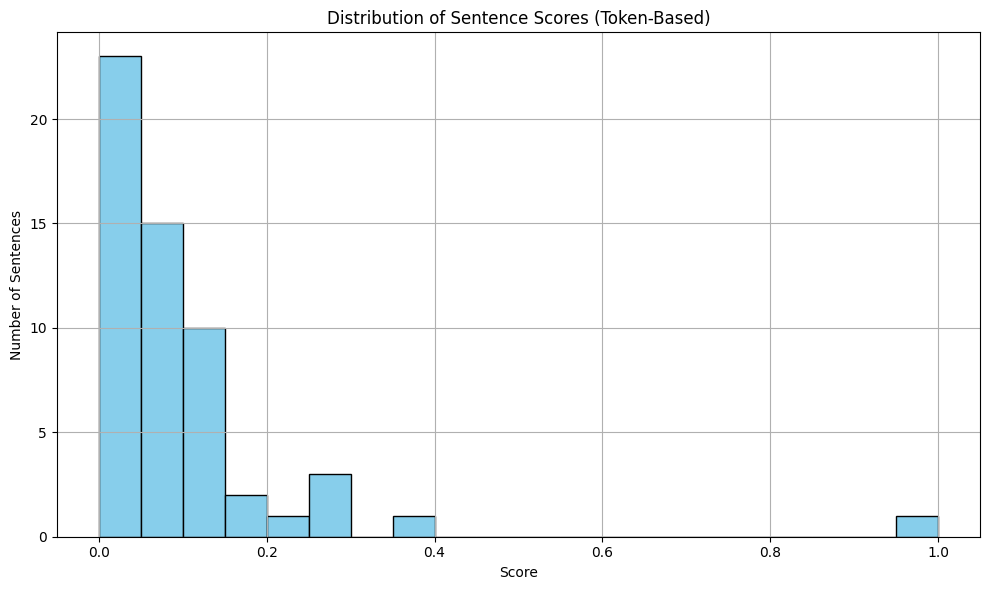

In [23]:
import pickle
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Load article HTML from .pkl
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# Extract raw text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# Process entire document
doc = nlp(text)

# Example most_common tokens — you should generate this earlier in your code
from collections import Counter
filtered_tokens = [
    token.text.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]
most_common = Counter(filtered_tokens).most_common(5)
interesting_tokens = [t[0] for t in most_common]

# Scoring function
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not words:
        return 0.0
    interesting_count = sum(1 for word in words if word in interesting_tokens)
    return interesting_count / len(words)

# Score each sentence
scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentence Scores (Token-Based)")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# The most common range of token scores is 0 to 0.15.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 7 Week 6

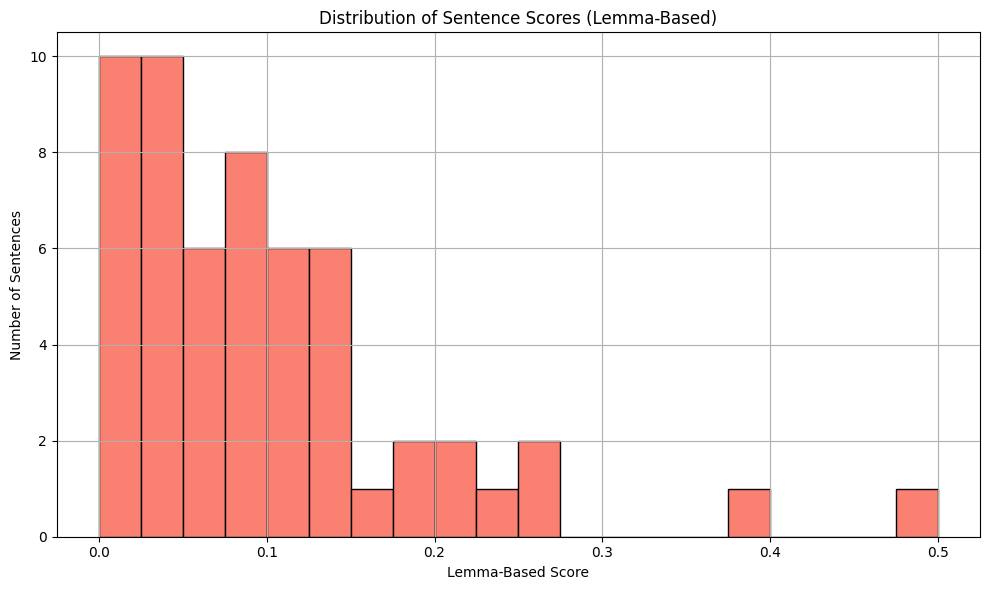

In [24]:
import pickle
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# 1. Load the article HTML from the .pkl
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# 2. Extract article text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# 3. Process the full document
doc = nlp(text)

# 4. Get interesting lemmas (e.g., top 5 frequent meaningful lemmas)
filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
most_common_lemmas = Counter(filtered_lemmas).most_common(5)
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]

# 5. Define scoring function using lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    if not lemmas:
        return 0.0
    match_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return match_count / len(lemmas)

# 6. Score all sentences in the article
lemma_scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in doc.sents]

# 7. Plot histogram of lemma-based sentence scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Sentence Scores (Lemma-Based)")
plt.xlabel("Lemma-Based Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# The most common range of lemma scores is 0 to 0.15.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

## Question 8 Week 6
We would use this key component to get the nouns in our list.  token.pos_ == 'NOUN'
However when I look at the top five tokens and lexems from questions 3 and 4 lists they are all nouns.  So I don't think any would be ommitted.  led refers to LED lights so that is a noun too.